<a href="https://colab.research.google.com/github/Shreyashjiodndian2/private-ai/blob/master/Sepsis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('Model_Train_Short.csv')
df

,id,time,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,pid,hospital,ShockIndex,BUN/CR,SaO2/FiO2,SOFA,SOFA_deterioration,ShockIndex_max,MAP_max,ShockIndex_min,MAP_min
0,1,0,84.0,98.0,37.036842,118.0,76.83,58.0,18.0,-0.170997,24.665193,0.523849,7.388063,39.306847,86.649323,46.114361,16.63605,75.652063,8.382698,104.048302,1.060115,0.602749,121.821778,1.93667,2.030579,3.566885,4.213792,1.914774,9.263189,30.973184,10.617129,40.080596,9.682634,303.582806,225.404556,83.14,0,1.0,225.404556,-0.03,1,1,1,0.711864,17.915357,inf,0.0,0.475187,0.711864,76.83,0.711864,76.83
1,1,1,97.0,95.0,37.036842,98.0,75.33,58.0,19.0,-0.170997,24.665193,0.523849,7.388063,39.306847,86.649323,46.114361,16.63605,75.652063,8.382698,104.048302,1.060115,0.602749,121.821778,1.93667,2.030579,3.566885,4.213792,1.914774,9.263189,30.973184,10.617129,40.080596,9.682634,303.582806,225.404556,83.14,0,1.0,225.404556,-0.03,2,1,1,0.989796,17.915357,inf,0.0,0.000000,0.989796,76.83,0.711864,75.33
2,1,2,89.0,99.0,37.036842,122.0,86.00,58.0,22.0,-0.170997,24.665193,0.523849,7.388063,39.306847,86.649323,46.114361,16.63605,75.652063,8.382698,104.048302,1.060115,0.602749,121.821778,1.93667,2.030579,3.566885,4.213792,1.914774,9.263189,30.973184,10.617129,40.080596,9.682634,303.582806,225.404556,83.14,0,1.0,225.404556,-0.03,3,1,1,0.729508,17.915357,inf,0.0,0.000000,0.989796,86.00,0.711864,75.33
3,1,3,90.0,95.0,37.036842,118.0,76.83,58.0,30.0,-0.170997,24.665193,0.523849,7.388063,39.306847,86.649323,46.114361,16.63605,75.652063,8.382698,104.048302,1.060115,0.602749,121.821778,1.93667,2.030579,3.566885,4.213792,1.914774,9.263189,30.973184,10.617129,40.080596,9.682634,303.582806,225.404556,83.14,0,1.0,225.404556,-0.03,4,1,1,0.762712,17.915357,inf,0.0,0.000000,0.989796,86.00,0.729508,75.33
4,1,4,103.0,88.5,37.036842,122.0,91.33,58.0,24.5,-0.170997,24.665193,0.523849,7.388063,39.306847,86.649323,46.114361,16.63605,75.652063,8.382698,104.048302,1.060115,0.602749,121.821778,1.93667,2.030579,3.566885,4.213792,1.914774,9.263189,30.973184,10.617129,40.080596,9.682634,303.582806,225.404556,83.14,0,1.0,225.404556,-0.03,5,1,1,0.844262,17.915357,inf,0.0,0.000000,0.844262,91.33,0.729508,76.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19419,500,41,83.0,98.0,37.036842,118.0,76.83,58.0,23.0,-0.170997,24.665193,0.523849,7.388063,39.306847,86.649323,46.114361,16.63605,75.652063,8.382698,104.048302,1.060115,0.602749,121.821778,1.93667,2.030579,2.900000,4.213792,0.200000,9.263189,30.973184,10.617129,40.080596,9.682634,303.582806,225.404556,50.04,0,1.0,225.404556,-0.01,42,500,1,0.703390,17.915357,inf,0.0,0.000000,0.703390,76.83,0.567797,76.83
19420,500,42,76.0,96.0,37.036842,110.0,74.67,58.0,22.0,-0.170997,24.665193,0.523849,7.388063,39.306847,86.649323,46.114361,16.63605,75.652063,8.382698,104.048302,1.060115,0.602749,121.821778,1.93667,2.030579,2.900000,4.213792,0.200000,9.263189,30.973184,10.617129,40.080596,9.682634,303.582806,225.404556,50.04,0,1.0,225.404556,-0.01,43,500,1,0.690909,17.915357,inf,0.0,0.000000,0.703390,76.83,0.610169,74.67
19421,500,43,84.0,98.0,37.036842,118.0,76.83,58.0,18.0,-0.170997,24.665193,0.523849,7.388063,39.306847,86.649323,46.114361,16.63605,75.652063,8.382698,104.048302,1.060115,0.602749,121.821778,1.93667,2.030579,2.900000,4.213792,0.200000,9.263189,30.973184,10.617129,40.080596,9.682634,303.582806,225.404556,50.04,0,1.0,225.404556,-0.01,44,500,1,0.711864,17.915357,inf,0.0,0.000000,0.711864,76.83,0.690909,74.67
19422,500,44,84.0,98.0,37.036842,118.0,76.83,58.0,18.0,-0.170997,24.665193,0.523849,7.388063,39.306847,86.649323,46.114361,16.63605,75.652063,8.382698,104.048302,1

In [ ]:
df2 = pd.read_csv('SepA_Imputed_5000.csv')
df2 = df2[df2['pid'] <= 500]
df2 = df2.sort_values(['pid','ICULOS'])
df2

,Unnamed: 0,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,pid
65262,265837,84.0,98.0,NaN,118.0,76.83,58.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,1.0,NaN,-0.03,1,0,1
65263,265838,97.0,95.0,NaN,98.0,75.33,58.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,1.0,NaN,-0.03,2,0,1
65264,265839,89.0,99.0,NaN,122.0,86.00,58.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,1.0,NaN,-0.03,3,0,1
65265,265840,90.0,95.0,NaN,118.0,76.83,58.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,1.0,NaN,-0.03,4,0,1
65266,265841,103.0,88.5,NaN,122.0,91.33,58.0,24.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,1.0,NaN,-0.03,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162298,652834,83.0,98.0,NaN,118.0,76.83,58.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.04,0,1.0,NaN,-0.01,42,0,500
162299,652835,76.0,96.0,NaN,110.0,74.67,58.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.04,0,1.0,NaN,-0.01,43,0,500
162300,652836,84.0,98.0,NaN,118.0,76.83,58.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.04,0,1.0,NaN,-0.01,44,0,500
162301,652837,84.0,98.0,NaN,118.0,76.83,58.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.04,0,1.0,NaN,-0.01,45,0,500


In [ ]:
df4 = df4.drop(columns=['SaO2/FiO2'])

In [ ]:
df3
df5 = pd.read_csv('Model_Train.csv')


In [ ]:
df4 = df5[df5['pid'] <= 800]
df4 = df4[df4['pid'] > 500]

In [ ]:
df5 = df5.drop(columns = ['SaO2/FiO2'])

In [ ]:
print(df5.shape)
df5

(194761, 51)


,id,time,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,pid,hospital,ShockIndex,BUN/CR,SOFA,SOFA_deterioration,ShockIndex_max,MAP_max,ShockIndex_min,MAP_min
0,1,0,84.0,98.0,37.036842,118.00,76.83,58.0,18.0,-0.170997,24.665193,0.523849,7.388063,39.306847,86.649323,46.114361,16.63605,75.652063,8.382698,104.048302,1.060115,0.602749,121.821778,1.93667,2.030579,3.566885,4.213792,1.914774,9.263189,30.973184,10.617129,40.080596,9.682634,303.582806,225.404556,83.14,0,1.0,225.404556,-0.03,1,1,1,0.711864,17.915357,0.0,0.475187,0.711864,76.83,0.711864,76.83
1,1,1,97.0,95.0,37.036842,98.00,75.33,58.0,19.0,-0.170997,24.665193,0.523849,7.388063,39.306847,86.649323,46.114361,16.63605,75.652063,8.382698,104.048302,1.060115,0.602749,121.821778,1.93667,2.030579,3.566885,4.213792,1.914774,9.263189,30.973184,10.617129,40.080596,9.682634,303.582806,225.404556,83.14,0,1.0,225.404556,-0.03,2,1,1,0.989796,17.915357,0.0,0.000000,0.989796,76.83,0.711864,75.33
2,1,2,89.0,99.0,37.036842,122.00,86.00,58.0,22.0,-0.170997,24.665193,0.523849,7.388063,39.306847,86.649323,46.114361,16.63605,75.652063,8.382698,104.048302,1.060115,0.602749,121.821778,1.93667,2.030579,3.566885,4.213792,1.914774,9.263189,30.973184,10.617129,40.080596,9.682634,303.582806,225.404556,83.14,0,1.0,225.404556,-0.03,3,1,1,0.729508,17.915357,0.0,0.000000,0.989796,86.00,0.711864,75.33
3,1,3,90.0,95.0,37.036842,118.00,76.83,58.0,30.0,-0.170997,24.665193,0.523849,7.388063,39.306847,86.649323,46.114361,16.63605,75.652063,8.382698,104.048302,1.060115,0.602749,121.821778,1.93667,2.030579,3.566885,4.213792,1.914774,9.263189,30.973184,10.617129,40.080596,9.682634,303.582806,225.404556,83.14,0,1.0,225.404556,-0.03,4,1,1,0.762712,17.915357,0.0,0.000000,0.989796,86.00,0.729508,75.33
4,1,4,103.0,88.5,37.036842,122.00,91.33,58.0,24.5,-0.170997,24.665193,0.523849,7.388063,39.306847,86.649323,46.114361,16.63605,75.652063,8.382698,104.048302,1.060115,0.602749,121.821778,1.93667,2.030579,3.566885,4.213792,1.914774,9.263189,30.973184,10.617129,40.080596,9.682634,303.582806,225.404556,83.14,0,1.0,225.404556,-0.03,5,1,1,0.844262,17.915357,0.0,0.000000,0.844262,91.33,0.729508,76.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194756,4998,39,52.0,93.0,37.000000,109.00,64.00,44.0,22.0,1.631000,21.987000,0.368000,7.483000,38.374000,87.133000,40.000000,14.45000,121.084000,8.110000,104.022000,0.645000,0.600000,120.000000,1.93667,2.446000,2.900000,4.009000,0.700000,9.263189,31.000000,11.813000,40.000000,9.242000,303.582806,170.943000,84.32,1,0.0,170.943000,-0.02,40,4998,2,0.477064,22.403101,1.0,1.000000,0.594872,64.00,0.477064,53.00
194757,4998,40,64.0,92.5,37.100000,123.00,72.00,45.0,23.0,1.377000,24.282000,0.475000,7.366000,32.252000,99.371000,40.000000,6.68400,119.659000,7.919000,109.866000,0.893000,0.600000,120.000000,1.93667,1.767000,2.900000,5.507000,0.700000,9.263189,31.000000,10.168000,40.000000,10.446000,303.582806,194.245000,84.32,1,0.0,194.245000,-0.02,41,4998,2,0.520325,7.484882,0.0,0.000000,0.594872,72.00,0.477064,53.00
194758,4998,41,64.5,90.5,37.200000,110.25,60.50,35.5,24.5,2.497000,21.870000,0.607000,7.343000,44.377000,98.193000,40.000000,16.68700,119.769000,10.050000,107.839000,1.133000,0.600000,120.000000,1.93667,1.648000,2.900000,4.014000,0.700000,9.263189,31.000000,10.392000,40.000000,6.645000,303.582806,253.344000,84.32,1,0.0,253.344000,-0.02,42,4998,2,0.585034,14.728155,1.0,1.000000,0.585034,72.00,0.477064,60.50
194759,4998,42,63.0,95.0,37.300000,110.50,63.00,40.0,28.0,-0.267000,26.049000,0.555000,7.383000,41.785000,82.973000,40.000000,24.51400,133.014000,9.996000,95.683000,1.193000,0.600000,120.00000

In [ ]:
df6 = pd.read_csv('SepA_Imputed_5000.csv')
df6 = df6.sort_values(['pid','ICULOS'])
df6 = df6[df6['pid'] < 4999]

NameError: ignored

In [ ]:
import numpy as np
Y = np.array(df6['SepsisLabel'])
X = np.array(df5).reshape(194761, 1, 51)

In [ ]:
Y.shape

(194761,)

In [ ]:
df4

,id,time,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,pid,hospital,ShockIndex,BUN/CR,SOFA,SOFA_deterioration,ShockIndex_max,MAP_max,ShockIndex_min,MAP_min
19424,501,0,84.0,98.0,37.036842,118.0,76.83,58.0,18.0,-0.170997,24.665193,0.523849,7.388063,39.306847,86.649323,46.114361,16.63605,75.652063,8.382698,104.048302,1.060115,0.602749,121.821778,1.93667,2.030579,3.566885,4.213792,1.914774,9.263189,30.973184,10.617129,40.080596,9.682634,303.582806,225.404556,81.91,1,1.0,225.404556,-5.29,1,501,1,0.711864,17.915357,0.0,0.475187,0.711864,76.83,0.711864,76.83
19425,501,1,95.0,96.0,37.036842,91.0,63.00,58.0,19.0,-0.170997,24.665193,0.523849,7.388063,39.306847,86.649323,46.114361,16.63605,75.652063,8.382698,104.048302,1.060115,0.602749,121.821778,1.93667,2.030579,3.566885,4.213792,1.914774,9.263189,30.973184,10.617129,40.080596,9.682634,303.582806,225.404556,81.91,1,1.0,225.404556,-5.29,2,501,1,1.043956,17.915357,1.0,1.000000,1.043956,76.83,0.711864,63.00
19426,501,2,87.0,99.0,37.036842,94.0,67.00,58.0,16.0,-0.170997,24.665193,0.523849,7.388063,39.306847,86.649323,46.114361,16.63605,75.652063,8.382698,104.048302,1.060115,0.602749,121.821778,1.93667,2.030579,3.566885,4.213792,1.914774,9.263189,30.973184,10.617129,40.080596,9.682634,303.582806,225.404556,81.91,1,1.0,225.404556,-5.29,3,501,1,0.925532,17.915357,1.0,1.000000,1.043956,76.83,0.711864,63.00
19427,501,3,87.0,98.0,37.036842,99.0,57.00,58.0,17.0,-0.170997,24.665193,0.523849,7.388063,39.306847,86.649323,46.114361,16.63605,75.652063,8.382698,104.048302,1.060115,0.602749,121.821778,1.93667,2.030579,3.566885,4.213792,1.914774,9.263189,30.973184,10.617129,40.080596,9.682634,303.582806,225.404556,81.91,1,1.0,225.404556,-5.29,4,501,1,0.878788,17.915357,1.0,1.000000,1.043956,67.00,0.878788,57.00
19428,501,4,88.0,98.0,37.036842,109.0,71.00,58.0,22.0,-0.170997,24.665193,0.523849,7.388063,39.306847,86.649323,46.114361,16.63605,75.652063,8.382698,104.048302,1.060115,0.602749,121.821778,1.93667,2.030579,3.100000,4.213792,1.914774,9.263189,30.973184,10.617129,40.080596,9.682634,303.582806,225.404556,81.91,1,1.0,225.404556,-5.29,5,501,1,0.807339,17.915357,0.0,0.000000,0.925532,71.00,0.807339,57.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31324,800,41,95.0,95.0,37.407000,94.0,68.67,58.0,18.0,-1.690000,29.383000,0.553000,7.384000,40.838000,81.792000,40.000000,24.70300,91.187000,9.428000,102.195000,1.075000,0.600000,120.000000,1.40000,1.740000,2.600000,4.379000,1.914774,9.263189,31.000000,10.400000,40.000000,4.825000,303.582806,251.009000,61.13,0,0.0,251.009000,-23.42,47,800,1,1.010638,22.979535,1.0,1.000000,1.010638,68.67,0.935185,61.00
31325,800,42,92.0,99.0,36.523000,106.0,74.00,58.0,13.0,-0.739000,22.534000,0.508000,7.317000,37.400000,81.781000,40.000000,9.51900,129.186000,7.138000,100.102000,1.528000,0.600000,120.000000,1.40000,2.646000,2.600000,3.654000,1.914774,9.263189,31.000000,9.665000,40.000000,3.573000,303.582806,117.715000,61.13,0,0.0,117.715000,-23.42,48,800,1,0.867925,6.229712,2.0,2.000000,1.010638,74.00,0.867925,61.00
31326,800,43,90.0,100.0,36.709000,128.5,92.17,58.0,20.5,-2.537000,25.111000,0.642000,7.410000,47.814000,98.868000,40.000000,18.32200,37.903000,8.279000,103.589000,1.223000,0.600000,120.000000,1.40000,2.300000,2.600000,4.515000,1.914774,9.263189,33.100000,10.195000,40.000000,6.926000,303.582806,136.444000,61.13,0,0.0,136.444000,-23.42,49,800,1,0.700389,14.981194,2.0,2.000000,1.010638,92.17,0.700389,68.67
31327,800,44,99.5,98.0,36.390000,108.5,73.83,58.0,20.0,-1.126000,29.266000,0.521000,7.355000,42.165000,84.126000,40.000000,21.93000,38.514000,9.248000,107.810000,1.503000,

In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

In [ ]:
from keras.layers import Bidirectional

model3 = Sequential()
model3.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(1, 51)))
#model2.add(Dense(32))
model3.add(Dense(1,activation='softmax'))
model3.compile(optimizer='adam', loss='binary_crossentropy',metrics = ['accuracy'])

history = model3.fit(X, Y, epochs=6, validation_split=0.2, verbose=1)

Train on 155808 samples, validate on 38953 samples
Epoch 1/6
155808/155808 [==============================] - 17s 109us/step - loss: 0.3114 - accuracy: 0.9713 - val_loss: 0.2422 - val_accuracy: 0.9786
Epoch 2/6
155808/155808 [==============================] - 16s 104us/step - loss: 0.1372 - accuracy: 0.9757 - val_loss: 0.1030 - val_accuracy: 0.9753
Epoch 3/6
155808/155808 [==============================] - 17s 109us/step - loss: 0.1161 - accuracy: 0.9771 - val_loss: 0.1922 - val_accuracy: 0.9787
Epoch 4/6
155808/155808 [==============================] - 16s 101us/step - loss: 0.1072 - accuracy: 0.9775 - val_loss: 0.1371 - val_accuracy: 0.9787
Epoch 5/6
155808/155808 [==============================] - 17s 109us/step - loss: 0.1028 - accuracy: 0.9779 - val_loss: 0.1031 - val_accuracy: 0.9787
Epoch 6/6
155808/155808 [==============================] - 17s 110us/step - loss: 0.1009 - accuracy: 0.9779 - val_loss: 0.1243 - val_accuracy: 0.9787


In [ ]:
from keras import Sequential
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential,Model
from keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization, CuDNNGRU, CuDNNLSTM

from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints


In [ ]:
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

In [ ]:
model = Sequential()
model.add(BatchNormalization(input_shape=(1, 51)))
model.add(Bidirectional(LSTM(128, dropout=0.4, recurrent_dropout=0.4, activation='relu', return_sequences=True)))
model.add(Bidirectional(CuDNNLSTM(64, return_sequences = True)))
model.add(Attention(10))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

ModuleNotFoundError: ignored

In [ ]:
model.fit(X, Y,
          batch_size=300,
          epochs=50)

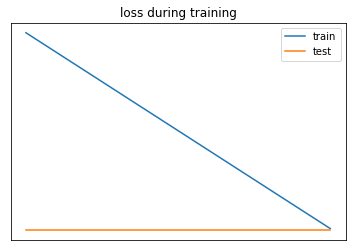

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.yticks([])
plt.xticks([])
plt.title("loss during training")
plt.show()

In [ ]:
model.save("multivariate_sepsis.h5")

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
df7 = df4[df4['pid'] == 650]
df7.shape

(57, 51)

In [ ]:
test_input = np.array(df7).reshape(57,1,51)
test_output = model3.predict(test_input, verbose=1)
print(test_output)

57/57 [==============================] - 0s 83us/step
[[0.01935786]
 [0.01888043]
 [0.01443186]
 [0.01631683]
 [0.01713908]
 [0.01751646]
 [0.01722655]
 [0.0159134 ]
 [0.01721197]
 [0.01722041]
 [0.01719549]
 [0.01724407]
 [0.02561945]
 [0.01938871]
 [0.02045682]
 [0.01927331]
 [0.02780783]
 [0.02034125]
 [0.02663818]
 [0.02087149]
 [0.03101838]
 [0.0268493 ]
 [0.03283393]
 [0.02468526]
 [0.03425559]
 [0.02811691]
 [0.02833563]
 [0.0291813 ]
 [0.03192881]
 [0.03207892]
 [0.03657094]
 [0.03948614]
 [0.0393247 ]
 [0.03971311]
 [0.0450767 ]
 [0.04371953]
 [0.04386073]
 [0.04737678]
 [0.04670209]
 [0.04980585]
 [0.0491384 ]
 [0.04916787]
 [0.05298206]
 [0.05135959]
 [0.05201572]
 [0.05023107]
 [0.05174088]
 [0.0512009 ]
 [0.05364904]
 [0.05143565]
 [0.05518246]
 [0.05927515]
 [0.07430527]
 [0.06730181]
 [0.07408914]
 [0.07475334]
 [0.0764164 ]]


In [ ]:
df6[df6['pid'] == 650]['SepsisLabel']

80555    0
80556    0
80557    0
80558    0
80559    0
80560    0
80561    0
80562    0
80563    0
80564    0
80565    0
80566    0
80567    0
80568    0
80569    0
80570    0
80571    0
80572    0
80573    0
80574    0
80575    0
80576    0
80577    0
80578    0
80579    0
80580    0
80581    0
80582    0
80583    0
80584    0
80585    0
80586    0
80587    0
80588    0
80589    0
80590    0
80591    0
80592    0
80593    0
80594    0
80595    0
80596    0
80597    0
80598    0
80599    0
80600    0
80601    0
80602    0
80603    1
80604    1
80605    1
80606    1
80607    1
80608    1
80609    1
80610    1
80611    1
Name: SepsisLabel, dtype: int64

In [ ]:
import pickle
m1 = load_model('multivariate_sepsis.h5')